In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

In [3]:
print(X_train.shape)

(50000, 28, 28)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])


Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# 5. Định nghĩa model
model = Sequential()


In [7]:
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))


In [8]:
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

In [9]:
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

In [11]:
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))


In [12]:
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

In [13]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])


In [14]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.2560 - accuracy: 0.9278 - val_loss: 0.0690 - val_accuracy: 0.9819
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.0601 - accuracy: 0.9826 - val_loss: 0.0789 - val_accuracy: 0.9752
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.0378 - accuracy: 0.9890 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 4/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0444 - val_accuracy: 0.9881
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.0171 - accuracy: 0.9953 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0512 - val_accuracy: 0.9847
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0387 -

KeyError: 'acc'

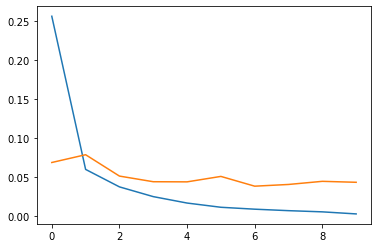

In [15]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


[0.035377100110054016, 0.9886000156402588]


In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


[0.035377100110054016, 0.9886000156402588]


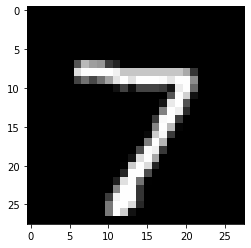

In [18]:
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [19]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

Giá trị dự đoán:  7
